In [1]:
import findspark
findspark.init()
from pyspark.sql import SparkSession

In [2]:
spark=SparkSession.builder.appName("sproject").config("spark.some.config.option","some-value").getOrCreate()

In [3]:
df=spark.read.csv("Loan.csv",header=True,inferSchema=True)

In [4]:
df.toPandas().head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
pf=df.toPandas()

In [6]:
pf.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


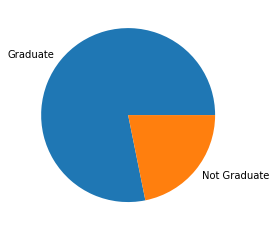

In [7]:
gr_count=df[df.Education=="Graduate"].count()
ngr_count=df[df.Education=="Not Graduate"].count()
import matplotlib.pyplot as plt
y=[gr_count,ngr_count]
lb=["Graduate","Not Graduate"]
plt.pie(y,labels=lb)
plt.show()

In [8]:
from pyspark.sql.functions import mean, md5
mean_val= df.select(mean(df['LoanAmount'])).collect()
mean_la=mean_val[0][0]
df=df.na.fill(mean_la,subset=['LoanAmount'])

In [9]:
df.toPandas().head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,146,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,Y


In [10]:

#removing null in laon amount term
from pyspark.sql.functions import isnan, when, count, col
LA_counts = df.groupBy(['Loan_Amount_Term']).count().alias('counts')
LA_counts.sort(col("count").desc()).show()
LA_mode=LA_counts.agg({"count": "max"}).collect()[0][0]
print(LA_mode)
temp_LA = LA_counts.filter(LA_counts['count']==LA_mode)
temp_LA.printSchema()
LA_mode = temp_LA.select(['Loan_Amount_Term']).collect()[0][0]
df=df.na.fill(LA_mode,subset=['Loan_Amount_Term'])

+----------------+-----+
|Loan_Amount_Term|count|
+----------------+-----+
|             360|  512|
|             180|   44|
|             480|   15|
|            null|   14|
|             300|   13|
|             240|    4|
|              84|    4|
|             120|    3|
|              60|    2|
|              36|    2|
|              12|    1|
+----------------+-----+

512
root
 |-- Loan_Amount_Term: integer (nullable = true)
 |-- count: long (nullable = false)



In [11]:
#remove null in gender
Gender_counts = df.groupBy(['Gender']).count().alias('counts')
Gender_counts.sort(col("count").desc()).show()
Gender_mode=Gender_counts.agg({"count": "max"}).collect()[0][0]
temp_Gender = Gender_counts.filter(Gender_counts['count']==Gender_mode)
Gender_mode = temp_Gender.select(['Gender']).collect()[0][0]
df=df.na.fill(Gender_mode,subset=['Gender'])

+------+-----+
|Gender|count|
+------+-----+
|  Male|  489|
|Female|  112|
|  null|   13|
+------+-----+



In [12]:
#removing null in married by mode
Mar_counts = df.groupBy(['Married']).count().alias('counts')
Mar_counts.sort(col("count").desc()).show()
Mar_mode=Mar_counts.agg({"count": "max"}).collect()[0][0]
temp_mar = Mar_counts.filter(Mar_counts['count']==Mar_mode)
Mar_mode = temp_mar.select(['Married']).collect()[0][0]
df=df.na.fill(Mar_mode,subset=['Married'])


+-------+-----+
|Married|count|
+-------+-----+
|    Yes|  398|
|     No|  213|
|   null|    3|
+-------+-----+



In [13]:
#removing null in dependent
Dep_counts = df.groupBy(['Dependents']).count().alias('counts')
Dep_counts.sort(col("count").desc()).show()
Dep_mode=Dep_counts.agg({"count": "max"}).collect()[0][0]
temp_dep = Dep_counts.filter(Dep_counts['count']==Dep_mode)
Dep_mode = temp_dep.select(['Dependents']).collect()[0][0]
df=df.na.fill(Dep_mode,subset=['Dependents'])

+----------+-----+
|Dependents|count|
+----------+-----+
|         0|  345|
|         1|  102|
|         2|  101|
|         3|   51|
|      null|   15|
+----------+-----+



In [14]:
#Removing null in self employed
emp_counts = df.groupBy(['Self_Employed']).count().alias('counts')
emp_counts.sort(col("count").desc()).show()
emp_mode=emp_counts.agg({"count": "max"}).collect()[0][0]
temp_emp = emp_counts.filter(emp_counts['count']==emp_mode)
emp_mode = temp_emp.select(['Self_Employed']).collect()[0][0]
df=df.na.fill(emp_mode,subset=['Self_Employed'])

+-------------+-----+
|Self_Employed|count|
+-------------+-----+
|           No|  500|
|          Yes|   82|
|         null|   32|
+-------------+-----+



In [15]:
#removing null in credit history
ch_counts = df.groupBy(['Credit_History']).count().alias('counts')
ch_counts.sort(col("count").desc()).show()
ch_mode=ch_counts.agg({"count": "max"}).collect()[0][0]
temp_ch = ch_counts.filter(ch_counts['count']==ch_mode)
ch_mode = temp_ch.select(['Credit_History']).collect()[0][0]
df=df.na.fill(ch_mode,subset=['Credit_History'])

+--------------+-----+
|Credit_History|count|
+--------------+-----+
|             1|  475|
|             0|   89|
|          null|   50|
+--------------+-----+



In [16]:
df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns]).toPandas().head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [17]:
df.toPandas().head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146,360,1,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360,1,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360,1,Urban,Y


In [18]:
#adding new feature total income
df_with_totalincome = df.withColumn('total_income', df['ApplicantIncome']+df['CoapplicantIncome'])
df_with_totalincome.toPandas().head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,total_income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146,360,1,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360,1,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360,1,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360,1,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360,1,Urban,Y,6000.0


In [19]:
#Adding new feature ratio of total income to loan amount
df_with_ratio = df_with_totalincome.withColumn('ratio', df_with_totalincome['total_income']/df_with_totalincome['LoanAmount'])
df_with_ratio.toPandas().head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,total_income,ratio
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146,360,1,Urban,Y,5849.0,40.061644
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360,1,Rural,N,6091.0,47.585938
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360,1,Urban,Y,3000.0,45.454545
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360,1,Urban,Y,4941.0,41.175000
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360,1,Urban,Y,6000.0,42.553191


In [20]:
selected_data = df_with_ratio.select('Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status','total_income','ratio')
selected_data.toPandas().head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,total_income,ratio
0,Male,No,0,Graduate,No,5849,0.0,146,360,1,Urban,Y,5849.0,40.061644
1,Male,Yes,1,Graduate,No,4583,1508.0,128,360,1,Rural,N,6091.0,47.585938
2,Male,Yes,0,Graduate,Yes,3000,0.0,66,360,1,Urban,Y,3000.0,45.454545
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360,1,Urban,Y,4941.0,41.175000
4,Male,No,0,Graduate,No,6000,0.0,141,360,1,Urban,Y,6000.0,42.553191


In [21]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.linalg import Vector
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import OneHotEncoder, StringIndexer
final = selected_data.where(selected_data.Gender.isNotNull())
final = final.where(final.Married.isNotNull())
final = final.where(final.Dependents.isNotNull())
final = final.where(final.Education.isNotNull())
final = final.where(final.Self_Employed.isNotNull())
final.toPandas().head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,total_income,ratio
0,Male,No,0,Graduate,No,5849,0.0,146,360,1,Urban,Y,5849.0,40.061644
1,Male,Yes,1,Graduate,No,4583,1508.0,128,360,1,Rural,N,6091.0,47.585938
2,Male,Yes,0,Graduate,Yes,3000,0.0,66,360,1,Urban,Y,3000.0,45.454545
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360,1,Urban,Y,4941.0,41.175000
4,Male,No,0,Graduate,No,6000,0.0,141,360,1,Urban,Y,6000.0,42.553191


In [22]:
#dummy coding gender Male =0 ; Female =1
gen_indexer = StringIndexer(inputCol="Gender", outputCol="_Gender_index" )
gen_model = gen_indexer.fit(final)
gen_indexed = gen_model.transform(final)
gen_encoder = OneHotEncoder( inputCol="_Gender_index", outputCol="_Gender_vec")
gen_encoder.setDropLast(False)
ohn=gen_encoder.fit(gen_indexed)
final1 = ohn.transform(gen_indexed)
final1.toPandas().head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,total_income,ratio,_Gender_index,_Gender_vec
0,Male,No,0,Graduate,No,5849,0.0,146,360,1,Urban,Y,5849.0,40.061644,0.0,"(1.0, 0.0)"
1,Male,Yes,1,Graduate,No,4583,1508.0,128,360,1,Rural,N,6091.0,47.585938,0.0,"(1.0, 0.0)"
2,Male,Yes,0,Graduate,Yes,3000,0.0,66,360,1,Urban,Y,3000.0,45.454545,0.0,"(1.0, 0.0)"
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360,1,Urban,Y,4941.0,41.175000,0.0,"(1.0, 0.0)"
4,Male,No,0,Graduate,No,6000,0.0,141,360,1,Urban,Y,6000.0,42.553191,0.0,"(1.0, 0.0)"


In [23]:
#Dummy coding Married Yes =0, No =1
mar_indexer = StringIndexer(inputCol="Married", outputCol="_Married_index" )
mar_model = mar_indexer.fit(final1)
mar_indexed = mar_model.transform(final1)
mar_encoder = OneHotEncoder( inputCol="_Married_index", outputCol="_Married_vec")
mar_encoder.setDropLast(False)
ohn2=mar_encoder.fit(mar_indexed)
final2 = ohn2.transform(mar_indexed)
final2.toPandas().head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,total_income,ratio,_Gender_index,_Gender_vec,_Married_index,_Married_vec
0,Male,No,0,Graduate,No,5849,0.0,146,360,1,Urban,Y,5849.0,40.061644,0.0,"(1.0, 0.0)",1.0,"(0.0, 1.0)"
1,Male,Yes,1,Graduate,No,4583,1508.0,128,360,1,Rural,N,6091.0,47.585938,0.0,"(1.0, 0.0)",0.0,"(1.0, 0.0)"
2,Male,Yes,0,Graduate,Yes,3000,0.0,66,360,1,Urban,Y,3000.0,45.454545,0.0,"(1.0, 0.0)",0.0,"(1.0, 0.0)"
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360,1,Urban,Y,4941.0,41.175000,0.0,"(1.0, 0.0)",0.0,"(1.0, 0.0)"
4,Male,No,0,Graduate,No,6000,0.0,141,360,1,Urban,Y,6000.0,42.553191,0.0,"(1.0, 0.0)",1.0,"(0.0, 1.0)"


In [24]:
#Dummy coding Dependent
dep_indexer = StringIndexer(inputCol="Dependents", outputCol="_Dependents_index" )
dep_model = dep_indexer.fit(final2)
dep_indexed = dep_model.transform(final2)
dep_encoder = OneHotEncoder( inputCol="_Dependents_index", outputCol="_Dependents_vec")
dep_encoder.setDropLast(False)
ohn3=dep_encoder.fit(dep_indexed)
final3 = ohn3.transform(dep_indexed)
final3.toPandas().head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,total_income,ratio,_Gender_index,_Gender_vec,_Married_index,_Married_vec,_Dependents_index,_Dependents_vec
0,Male,No,0,Graduate,No,5849,0.0,146,360,1,Urban,Y,5849.0,40.061644,0.0,"(1.0, 0.0)",1.0,"(0.0, 1.0)",0.0,"(1.0, 0.0, 0.0, 0.0)"
1,Male,Yes,1,Graduate,No,4583,1508.0,128,360,1,Rural,N,6091.0,47.585938,0.0,"(1.0, 0.0)",0.0,"(1.0, 0.0)",1.0,"(0.0, 1.0, 0.0, 0.0)"
2,Male,Yes,0,Graduate,Yes,3000,0.0,66,360,1,Urban,Y,3000.0,45.454545,0.0,"(1.0, 0.0)",0.0,"(1.0, 0.0)",0.0,"(1.0, 0.0, 0.0, 0.0)"
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360,1,Urban,Y,4941.0,41.175000,0.0,"(1.0, 0.0)",0.0,"(1.0, 0.0)",0.0,"(1.0, 0.0, 0.0, 0.0)"
4,Male,No,0,Graduate,No,6000,0.0,141,360,1,Urban,Y,6000.0,42.553191,0.0,"(1.0, 0.0)",1.0,"(0.0, 1.0)",0.0,"(1.0, 0.0, 0.0, 0.0)"


In [25]:
#Dummy coding Education graduate =0 ; not graduate =1
edu_indexer = StringIndexer(inputCol="Education", outputCol="_Education_index" )
edu_model = edu_indexer.fit(final3)
edu_indexed = edu_model.transform(final3)
edu_encoder = OneHotEncoder( inputCol="_Education_index", outputCol="_Education_vec")
edu_encoder.setDropLast(False)
ohn4=edu_encoder.fit(edu_indexed)
final4 = ohn4.transform(edu_indexed)
final4.toPandas().head()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,...,total_income,ratio,_Gender_index,_Gender_vec,_Married_index,_Married_vec,_Dependents_index,_Dependents_vec,_Education_index,_Education_vec
0,Male,No,0,Graduate,No,5849,0.0,146,360,1,...,5849.0,40.061644,0.0,"(1.0, 0.0)",1.0,"(0.0, 1.0)",0.0,"(1.0, 0.0, 0.0, 0.0)",0.0,"(1.0, 0.0)"
1,Male,Yes,1,Graduate,No,4583,1508.0,128,360,1,...,6091.0,47.585938,0.0,"(1.0, 0.0)",0.0,"(1.0, 0.0)",1.0,"(0.0, 1.0, 0.0, 0.0)",0.0,"(1.0, 0.0)"
2,Male,Yes,0,Graduate,Yes,3000,0.0,66,360,1,...,3000.0,45.454545,0.0,"(1.0, 0.0)",0.0,"(1.0, 0.0)",0.0,"(1.0, 0.0, 0.0, 0.0)",0.0,"(1.0, 0.0)"
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360,1,...,4941.0,41.175000,0.0,"(1.0, 0.0)",0.0,"(1.0, 0.0)",0.0,"(1.0, 0.0, 0.0, 0.0)",1.0,"(0.0, 1.0)"
4,Male,No,0,Graduate,No,6000,0.0,141,360,1,...,6000.0,42.553191,0.0,"(1.0, 0.0)",1.0,"(0.0, 1.0)",0.0,"(1.0, 0.0, 0.0, 0.0)",0.0,"(1.0, 0.0)"


In [26]:
#Dummy coding Self employed No =0 ; Yes= 1
emp_indexer = StringIndexer(inputCol="Self_Employed", outputCol="_Self_Employed_index" )
emp_model = emp_indexer.fit(final4)
emp_indexed = emp_model.transform(final4)
emp_encoder = OneHotEncoder( inputCol="_Self_Employed_index", outputCol="_Self_Employed_vec")
emp_encoder.setDropLast(False)
ohn5=emp_encoder.fit(emp_indexed)
final5 = ohn5.transform(emp_indexed)
final5.toPandas().head()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,...,_Gender_index,_Gender_vec,_Married_index,_Married_vec,_Dependents_index,_Dependents_vec,_Education_index,_Education_vec,_Self_Employed_index,_Self_Employed_vec
0,Male,No,0,Graduate,No,5849,0.0,146,360,1,...,0.0,"(1.0, 0.0)",1.0,"(0.0, 1.0)",0.0,"(1.0, 0.0, 0.0, 0.0)",0.0,"(1.0, 0.0)",0.0,"(1.0, 0.0)"
1,Male,Yes,1,Graduate,No,4583,1508.0,128,360,1,...,0.0,"(1.0, 0.0)",0.0,"(1.0, 0.0)",1.0,"(0.0, 1.0, 0.0, 0.0)",0.0,"(1.0, 0.0)",0.0,"(1.0, 0.0)"
2,Male,Yes,0,Graduate,Yes,3000,0.0,66,360,1,...,0.0,"(1.0, 0.0)",0.0,"(1.0, 0.0)",0.0,"(1.0, 0.0, 0.0, 0.0)",0.0,"(1.0, 0.0)",1.0,"(0.0, 1.0)"
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360,1,...,0.0,"(1.0, 0.0)",0.0,"(1.0, 0.0)",0.0,"(1.0, 0.0, 0.0, 0.0)",1.0,"(0.0, 1.0)",0.0,"(1.0, 0.0)"
4,Male,No,0,Graduate,No,6000,0.0,141,360,1,...,0.0,"(1.0, 0.0)",1.0,"(0.0, 1.0)",0.0,"(1.0, 0.0, 0.0, 0.0)",0.0,"(1.0, 0.0)",0.0,"(1.0, 0.0)"


In [27]:
#Dummy coding Property Area Urban =1; Rural =0;semiurban =2
area_indexer = StringIndexer(inputCol="Property_Area", outputCol="_Property_Area_index" )
area_model = area_indexer.fit(final5)
area_indexed = area_model.transform(final5)
area_encoder = OneHotEncoder( inputCol="_Property_Area_index", outputCol="_Property_Area_vec")
area_encoder.setDropLast(False)
ohn6=area_encoder.fit(area_indexed)
final6 = ohn6.transform(area_indexed)
final6.toPandas().head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,...,_Married_index,_Married_vec,_Dependents_index,_Dependents_vec,_Education_index,_Education_vec,_Self_Employed_index,_Self_Employed_vec,_Property_Area_index,_Property_Area_vec
0,Male,No,0,Graduate,No,5849,0.0,146,360,1,...,1.0,"(0.0, 1.0)",0.0,"(1.0, 0.0, 0.0, 0.0)",0.0,"(1.0, 0.0)",0.0,"(1.0, 0.0)",1.0,"(0.0, 1.0, 0.0)"
1,Male,Yes,1,Graduate,No,4583,1508.0,128,360,1,...,0.0,"(1.0, 0.0)",1.0,"(0.0, 1.0, 0.0, 0.0)",0.0,"(1.0, 0.0)",0.0,"(1.0, 0.0)",2.0,"(0.0, 0.0, 1.0)"
2,Male,Yes,0,Graduate,Yes,3000,0.0,66,360,1,...,0.0,"(1.0, 0.0)",0.0,"(1.0, 0.0, 0.0, 0.0)",0.0,"(1.0, 0.0)",1.0,"(0.0, 1.0)",1.0,"(0.0, 1.0, 0.0)"
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360,1,...,0.0,"(1.0, 0.0)",0.0,"(1.0, 0.0, 0.0, 0.0)",1.0,"(0.0, 1.0)",0.0,"(1.0, 0.0)",1.0,"(0.0, 1.0, 0.0)"
4,Male,No,0,Graduate,No,6000,0.0,141,360,1,...,1.0,"(0.0, 1.0)",0.0,"(1.0, 0.0, 0.0, 0.0)",0.0,"(1.0, 0.0)",0.0,"(1.0, 0.0)",1.0,"(0.0, 1.0, 0.0)"


In [28]:
loan_indexer = StringIndexer(inputCol="Loan_Status", outputCol="_Loan_Status_index" )
loan_model = loan_indexer.fit(final6)
loan_indexed = loan_model.transform(final6)
loan_encoder = OneHotEncoder( inputCol="_Loan_Status_index", outputCol="_Loan_Status_vec")
loan_encoder.setDropLast(False)
ohn7=loan_encoder.fit(loan_indexed)
final7 = ohn7.transform(loan_indexed)
final7.toPandas().head()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,...,_Dependents_index,_Dependents_vec,_Education_index,_Education_vec,_Self_Employed_index,_Self_Employed_vec,_Property_Area_index,_Property_Area_vec,_Loan_Status_index,_Loan_Status_vec
0,Male,No,0,Graduate,No,5849,0.0,146,360,1,...,0.0,"(1.0, 0.0, 0.0, 0.0)",0.0,"(1.0, 0.0)",0.0,"(1.0, 0.0)",1.0,"(0.0, 1.0, 0.0)",0.0,"(1.0, 0.0)"
1,Male,Yes,1,Graduate,No,4583,1508.0,128,360,1,...,1.0,"(0.0, 1.0, 0.0, 0.0)",0.0,"(1.0, 0.0)",0.0,"(1.0, 0.0)",2.0,"(0.0, 0.0, 1.0)",1.0,"(0.0, 1.0)"
2,Male,Yes,0,Graduate,Yes,3000,0.0,66,360,1,...,0.0,"(1.0, 0.0, 0.0, 0.0)",0.0,"(1.0, 0.0)",1.0,"(0.0, 1.0)",1.0,"(0.0, 1.0, 0.0)",0.0,"(1.0, 0.0)"
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360,1,...,0.0,"(1.0, 0.0, 0.0, 0.0)",1.0,"(0.0, 1.0)",0.0,"(1.0, 0.0)",1.0,"(0.0, 1.0, 0.0)",0.0,"(1.0, 0.0)"
4,Male,No,0,Graduate,No,6000,0.0,141,360,1,...,0.0,"(1.0, 0.0, 0.0, 0.0)",0.0,"(1.0, 0.0)",0.0,"(1.0, 0.0)",1.0,"(0.0, 1.0, 0.0)",0.0,"(1.0, 0.0)"


In [29]:
final7.columns

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status',
 'total_income',
 'ratio',
 '_Gender_index',
 '_Gender_vec',
 '_Married_index',
 '_Married_vec',
 '_Dependents_index',
 '_Dependents_vec',
 '_Education_index',
 '_Education_vec',
 '_Self_Employed_index',
 '_Self_Employed_vec',
 '_Property_Area_index',
 '_Property_Area_vec',
 '_Loan_Status_index',
 '_Loan_Status_vec']

In [30]:
assembler = VectorAssembler(inputCols = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','total_income','ratio',
 '_Gender_vec', 
 '_Married_vec', 
 '_Dependents_vec','_Education_vec','_Self_Employed_vec','_Property_Area_vec'], outputCol = 'features')

In [31]:
final8 = assembler.transform(final7)

In [32]:
final8.columns

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status',
 'total_income',
 'ratio',
 '_Gender_index',
 '_Gender_vec',
 '_Married_index',
 '_Married_vec',
 '_Dependents_index',
 '_Dependents_vec',
 '_Education_index',
 '_Education_vec',
 '_Self_Employed_index',
 '_Self_Employed_vec',
 '_Property_Area_index',
 '_Property_Area_vec',
 '_Loan_Status_index',
 '_Loan_Status_vec',
 'features']

In [33]:
new_final= final8.select("features","_Loan_Status_index")
new_final.toPandas().head()

,features,_Loan_Status_index
0,"(5849.0, 0.0, 146.0, 360.0, 1.0, 5849.0, 40.06...",0.0
1,"(4583.0, 1508.0, 128.0, 360.0, 1.0, 6091.0, 47...",1.0
2,"(3000.0, 0.0, 66.0, 360.0, 1.0, 3000.0, 45.454...",0.0
3,"(2583.0, 2358.0, 120.0, 360.0, 1.0, 4941.0, 41...",0.0
4,"(6000.0, 0.0, 141.0, 360.0, 1.0, 6000.0, 42.55...",0.0


In [34]:
train_data, test_data = new_final.randomSplit([0.7, 0.3])

In [35]:
test_data.toPandas().head(30)

,features,_Loan_Status_index
0,"(2083.0, 3150.0, 128.0, 360.0, 1.0, 5233.0, 40...",0.0
1,"(2130.0, 6666.0, 70.0, 180.0, 1.0, 8796.0, 125...",1.0
2,"(2500.0, 2118.0, 104.0, 360.0, 1.0, 4618.0, 44...",0.0
3,"(4583.0, 5625.0, 255.0, 360.0, 1.0, 10208.0, 4...",0.0
4,"(5695.0, 4167.0, 175.0, 360.0, 1.0, 9862.0, 56...",0.0
5,"(6000.0, 2250.0, 265.0, 360.0, 1.0, 8250.0, 31...",1.0
6,"(6333.0, 4583.0, 259.0, 360.0, 1.0, 10916.0, 4...",0.0
7,"(2600.0, 3500.0, 115.0, 360.0, 1.0, 6100.0, 53...",0.0
8,"(3013.0, 3033.0, 95.0, 300.0, 1.0, 6046.0, 63....",0.0
9,"(3173.0, 3021.0, 137.0, 360.0, 1.0, 6194.0, 45...",0.0


In [36]:
lr = LogisticRegression(featuresCol = 'features', labelCol = '_Loan_Status_index', maxIter = 10)
train_data.printSchema()
lr_Model = lr.fit(train_data)
pred=lr_Model.transform(test_data)
pred.select("features","_Loan_Status_index").toPandas().head(30)


root
 |-- features: vector (nullable = true)
 |-- _Loan_Status_index: double (nullable = false)



,features,_Loan_Status_index
0,"(2083.0, 3150.0, 128.0, 360.0, 1.0, 5233.0, 40...",0.0
1,"(2130.0, 6666.0, 70.0, 180.0, 1.0, 8796.0, 125...",1.0
2,"(2500.0, 2118.0, 104.0, 360.0, 1.0, 4618.0, 44...",0.0
3,"(4583.0, 5625.0, 255.0, 360.0, 1.0, 10208.0, 4...",0.0
4,"(5695.0, 4167.0, 175.0, 360.0, 1.0, 9862.0, 56...",0.0
5,"(6000.0, 2250.0, 265.0, 360.0, 1.0, 8250.0, 31...",1.0
6,"(6333.0, 4583.0, 259.0, 360.0, 1.0, 10916.0, 4...",0.0
7,"(2600.0, 3500.0, 115.0, 360.0, 1.0, 6100.0, 53...",0.0
8,"(3013.0, 3033.0, 95.0, 300.0, 1.0, 6046.0, 63....",0.0
9,"(3173.0, 3021.0, 137.0, 360.0, 1.0, 6194.0, 45...",0.0


In [37]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator
my_eval=BinaryClassificationEvaluator(labelCol="_Loan_Status_index")
         

In [38]:
logi=my_eval.evaluate(pred)*100
logi

75.48980933596312

In [39]:
#Random forest
from pyspark.ml.classification import RandomForestClassifier
rfc = RandomForestClassifier()
rfc = RandomForestClassifier(labelCol = "_Loan_Status_index", featuresCol = "features")
rfc_model = rfc.fit(train_data)
rfc_=rfc_model.transform(test_data)
rfc_.select("features","_Loan_Status_index").toPandas().head()

,features,_Loan_Status_index
0,"(2083.0, 3150.0, 128.0, 360.0, 1.0, 5233.0, 40...",0.0
1,"(2130.0, 6666.0, 70.0, 180.0, 1.0, 8796.0, 125...",1.0
2,"(2500.0, 2118.0, 104.0, 360.0, 1.0, 4618.0, 44...",0.0
3,"(4583.0, 5625.0, 255.0, 360.0, 1.0, 10208.0, 4...",0.0
4,"(5695.0, 4167.0, 175.0, 360.0, 1.0, 9862.0, 56...",0.0


In [40]:
my_eval3 = BinaryClassificationEvaluator(labelCol = '_Loan_Status_index')
ran=my_eval3.evaluate(rfc_)*100
ran



74.91781722550954

In [41]:
#decision tree
from pyspark.ml.classification import DecisionTreeClassifier, GBTClassifier
dtc = DecisionTreeClassifier()
dtc = DecisionTreeClassifier(labelCol = "_Loan_Status_index", featuresCol = "features")
dtc_model = dtc.fit(train_data)
dtc_pred = dtc_model.transform(test_data)
dtc_pred.select("features","_Loan_Status_index").toPandas().head()


,features,_Loan_Status_index
0,"(2083.0, 3150.0, 128.0, 360.0, 1.0, 5233.0, 40...",0.0
1,"(2130.0, 6666.0, 70.0, 180.0, 1.0, 8796.0, 125...",1.0
2,"(2500.0, 2118.0, 104.0, 360.0, 1.0, 4618.0, 44...",0.0
3,"(4583.0, 5625.0, 255.0, 360.0, 1.0, 10208.0, 4...",0.0
4,"(5695.0, 4167.0, 175.0, 360.0, 1.0, 9862.0, 56...",0.0


In [42]:
my_eval2 = BinaryClassificationEvaluator(labelCol = '_Loan_Status_index')
dec=my_eval2.evaluate(dtc_pred)*100
dec


41.92636423405654

In [43]:
#Gradient Boosting
gbc = GBTClassifier
gbc = GBTClassifier(labelCol = "_Loan_Status_index", featuresCol = "features")
gbc_model = gbc.fit(train_data)
gbc_pred = gbc_model.transform(test_data)
gbc_pred.select("features","_Loan_Status_index").toPandas().head()


,features,_Loan_Status_index
0,"(2083.0, 3150.0, 128.0, 360.0, 1.0, 5233.0, 40...",0.0
1,"(2130.0, 6666.0, 70.0, 180.0, 1.0, 8796.0, 125...",1.0
2,"(2500.0, 2118.0, 104.0, 360.0, 1.0, 4618.0, 44...",0.0
3,"(4583.0, 5625.0, 255.0, 360.0, 1.0, 10208.0, 4...",0.0
4,"(5695.0, 4167.0, 175.0, 360.0, 1.0, 9862.0, 56...",0.0


In [44]:
my_eval4 = BinaryClassificationEvaluator(labelCol = '_Loan_Status_index')
gra=my_eval4.evaluate(gbc_pred)*100
gra



73.37278106508869

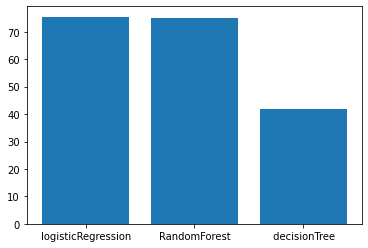

[75.48980933596312, 74.91781722550954, 41.92636423405654]

In [45]:
li=[logi,ran,dec]
la=["logisticRegression","RandomForest"," decisionTree"]
plt.bar(la,li)
plt.show()
li


In [46]:
pf.head(8)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0.0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3.0,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N


In [47]:
pf["Dependents"].fillna(0,inplace=True)

In [48]:
pf["Education"].fillna("Not Graduate",inplace=True)
pf["Self_Employed"].fillna("No",inplace=True)
pf["ApplicantIncome"].fillna(pf["ApplicantIncome"].mean(),inplace=True)
pf["LoanAmount"].fillna(pf["LoanAmount"].mean(),inplace=True)
pf["Credit_History"].fillna(pf["Credit_History"].mean(),inplace=True)
pf["Property_Area"].fillna("Rural",inplace=True)
pf["Loan_Status"].fillna("Y",inplace=True)


In [49]:
pf1=pf.drop(["Loan_ID","Gender","Married","CoapplicantIncome","Loan_Amount_Term"],axis=1)

In [50]:
pf1.columns

Index(['Dependents', 'Education', 'Self_Employed', 'ApplicantIncome',
       'LoanAmount', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [51]:
pf1.head(10)

,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
0,0.0,Graduate,No,5849,146.412162,1.0,Urban,Y
1,1.0,Graduate,No,4583,128.000000,1.0,Rural,N
2,0.0,Graduate,Yes,3000,66.000000,1.0,Urban,Y
3,0.0,Not Graduate,No,2583,120.000000,1.0,Urban,Y
4,0.0,Graduate,No,6000,141.000000,1.0,Urban,Y
5,2.0,Graduate,Yes,5417,267.000000,1.0,Urban,Y
6,0.0,Not Graduate,No,2333,95.000000,1.0,Urban,Y
7,3.0,Graduate,No,3036,158.000000,0.0,Semiurban,N
8,2.0,Graduate,No,4006,168.000000,1.0,Urban,Y
9,1.0,Graduate,No,12841,349.000000,1.0,Semiurban,N


In [52]:
#testing the na values
pf1["Dependents"].isna().sum()
pf1["Education"].isna().sum()
pf1["Self_Employed"].isna().sum()
pf1["Self_Employed"].isna().sum()
pf1["ApplicantIncome"].isna().sum()
pf1["LoanAmount"].isna().sum()
pf1["Credit_History"].isna().sum()
pf1["Property_Area"].isna().sum()
pf1["Loan_Status"].isna().sum()

0

In [53]:
from sklearn.preprocessing import LabelEncoder

In [54]:
edu=LabelEncoder()
sel_f=LabelEncoder()
pr_area=LabelEncoder()
loan_s=LabelEncoder()
dep=LabelEncoder()

In [55]:
pf1["Education_"]=edu.fit_transform(pf1["Education"])
pf1["Self_Employed_"]=sel_f.fit_transform(pf1["Self_Employed"])
pf1["Property_Area_"]=pr_area.fit_transform(pf1["Property_Area"])
pf1["Loan_Status_"]=loan_s.fit_transform(pf1["Loan_Status"])
pf1["Dependents_"]=dep.fit_transform(pf1["Dependents"])




In [56]:
pf2=pf1.drop(["Education","Self_Employed","Property_Area","Loan_Status","Dependents"],axis=1)

In [57]:
pf2.columns
pf2.head()


,ApplicantIncome,LoanAmount,Credit_History,Education_,Self_Employed_,Property_Area_,Loan_Status_,Dependents_
0,5849,146.412162,1.0,0,0,2,1,0
1,4583,128.000000,1.0,0,0,0,0,1
2,3000,66.000000,1.0,0,1,2,1,0
3,2583,120.000000,1.0,1,0,2,1,0
4,6000,141.000000,1.0,0,0,2,1,0


In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
classifier=RandomForestClassifier(n_estimators=20)
classifier.fit(pf2[["Dependents_", "ApplicantIncome", "LoanAmount", "Credit_History", "Education_", "Self_Employed_", "Property_Area_"]],pf2["Loan_Status_"])

RandomForestClassifier(n_estimators=20)

In [60]:
data=classifier.predict([[1,4583,128,1,0,0,0]])
data

array([0])